# Mnist Digit Dataset

The MNIST digit dataset consist of 28x28 pixel hand drawn digits. Each row in the dataset consist of a sample. Each sample has 784 pixel values of 0 to 255 indicating the grey scale. This dataset will be used to train this projects neural network and another mnist digit test set will be used for validating the neural network

![MNIST_Digits](https://storage.googleapis.com/tfds-data/visualization/fig/mnist-3.0.1.png)

In [1]:
# Import relevant modules for training the dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read training set using pandas
df = pd.read_csv('mnist_train.csv')

# Print first 5 rows
print(df.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

Each sample is a row from the dataset. Using matplotlib, a random sample from the dataset can be plotted.

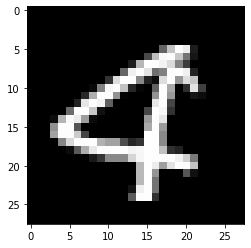

In [19]:
# Function to plot a random sample from a dataset
def plot_sample(dataset):
    # Gather sample
    sample = [dataset.iloc[np.random.randint(728), 1:]]
    # Convert to numpy array and reshape it into a 28x28 matrix
    sample = np.array([sample])
    sample = sample.reshape((28,28))
    # Plot the sample
    plt.gray()
    plt.imshow(sample, interpolation = 'nearest')
    plt.show()

# Call the function
plot_sample(df)

To test our dataset and prevent overfitting, 20% of the data will be used for testing the model.

For this neural network , there will be three layers: The input layer will consist of 784 neurons indicating the pixel value of a sample; the hidden layer will consist of 10 neurons and the output layer will consist of 10 neurons indicating each possible digit.

In [20]:
# Import NN classes 
from layer_dense import *
from cost_functions import *
from optimisers import *

# Randomise df
df = df.sample(frac=1)

# Split df into training and testing data
df_test = df[0:8400]
df_train = df[8400:42000]

# Create training dataset
X_train = df_train.iloc[:,1:]
y_train = df_train.iloc[:, 0]

# Convert X into a numpy array and ramdomise the dataset
X_train = np.array(X_train)

# Initiate hidden layer with 784 input values and 10 neurons
hidden_layer = LayerDense(784, 10)
# Initiate ReLU activation object
relu = ActivationRelU()
# Initiate output layer with 10 input values and 10 neurons 
output_layer = LayerDense(10, 10)
# Initate softmax and cost functions with the ActivationSoftmaxCost object
softmax_cost = ActivationSoftmaxCost()

# Initiate optimiser object for back propagation 
sgd = Optimizer_SGD(learning_rate=0.001 ,decay=1.1e-4, momentum=100)

# Train in epochs. 501 iterations.
for epoch in range(501):
    # Forward propagation
    hidden_layer.forward(X_train)
    relu.forward(hidden_layer.output)
    output_layer.forward(relu.output)
    
    # Calculate error
    cost = softmax_cost.forward(output_layer.output, y_train)
    
    # Calculate accuracy from output of softmax and y
    predictions = np.argmax(softmax_cost.output, axis=1)
    accuracy = np.mean(predictions==y_train)
    
    # Print statistics per set of epochs
    if not epoch % 10:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {cost:.3f}, ' +
              f'lr: {sgd.current_learning_rate}')
        
    # Back propagation 
    softmax_cost.backward(softmax_cost.output, y_train)
    output_layer.backward(softmax_cost.dinputs)
    relu.backward(output_layer.dinputs)
    hidden_layer.backward(relu.dinputs)
    
    # Update weights and biases
    sgd.pre_update_params()
    sgd.update_params(hidden_layer)
    sgd.update_params(output_layer)
    sgd.post_update_params()

epoch: 0, acc: 0.060, loss: 2.592, lr: 0.001
epoch: 10, acc: 0.401, loss: 1.802, lr: 0.0009990109791306607
epoch: 20, acc: 0.622, loss: 1.244, lr: 0.0009979143589897116
epoch: 30, acc: 0.700, loss: 0.970, lr: 0.0009968201437414647
epoch: 40, acc: 0.742, loss: 0.829, lr: 0.0009957283254836751
epoch: 50, acc: 0.771, loss: 0.739, lr: 0.0009946388963486806
epoch: 60, acc: 0.792, loss: 0.675, lr: 0.000993551848503214
epoch: 70, acc: 0.809, loss: 0.626, lr: 0.000992467174148215
epoch: 80, acc: 0.825, loss: 0.586, lr: 0.000991384865518643
epoch: 90, acc: 0.837, loss: 0.555, lr: 0.0009903049148832926
epoch: 100, acc: 0.799, loss: 0.609, lr: 0.0009892273145446092
epoch: 110, acc: 0.846, loss: 0.523, lr: 0.0009881520568385063
epoch: 120, acc: 0.859, loss: 0.491, lr: 0.0009870791341341834
epoch: 130, acc: 0.864, loss: 0.472, lr: 0.0009860085388339465
epoch: 140, acc: 0.869, loss: 0.457, lr: 0.0009849402633730264
epoch: 150, acc: 0.872, loss: 0.446, lr: 0.000983874300219404
epoch: 160, acc: 0.875,

The NN achieved ~87% accuracy with the training set. This could be improved with more iteration, another layer or more neurons in the hidden layer - provided overfitting doesn't occur.

Testing data will be used to test the model using df_test dataframe created with the original dataset.

In [21]:
# Create test data
X_test = df_test.iloc[:,1:]
y_test = df_test.iloc[:, 0]

# Pass dataset through the model using the final params
hidden_layer.forward(X_test)
relu.forward(hidden_layer.output)
output_layer.forward(relu.output)
cost = softmax_cost.forward(output_layer.output, y_test)

# Calculate accuracy and loss for the test dataset
predictions = np.argmax(softmax_cost.output, axis = 1)
# If y_test is a binary vector, convert to scalar values
if len(y_test.shape) == 2:
    y_test = np.argmax(y_test, axis = 1)
accuracy = np.mean(predictions == y_test)

# Print statistics
print(f'test, acc: {accuracy:.3f}, loss: {cost:.3f}')


test, acc: 0.900, loss: 0.347


We can conclude that our model is accurate and major overfitting has not occurred.

Kaggle has also provided data that hasn't been seen and has no labels to indicate the which digit the sample is. The model can be used to predict the digit and the sample can be plotted like above to check if the model was correct.

In [22]:
# Read unseen data
df = pd.read_csv('mnist_test.csv')
print(df.head())

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0   

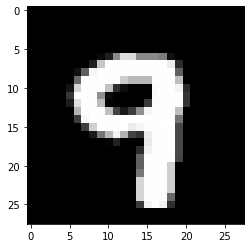

The Model has predicted the digit is a 9


In [31]:
# Function to generate a random sample from a dataset
def random_sample(dataset):
    # Gather sample
    sample = [dataset.iloc[np.random.randint(728)]]
    # Convert to numpy array and reshape it into a 28x28 matrix
    sample_array = np.array([sample])
    sample_array = sample_array.reshape((28,28))
    # Plot the sample
    return sample, sample_array

# Plot random sample from the dataset
sample, sample_array = random_sample(df)
plt.gray()
plt.imshow(sample_array, interpolation = 'nearest')
plt.show()

# Convert sample into an numpy array
sample = np.array(sample)

# Need the activation softmax class as we are no longer calculating error
softmax = ActivationSoftmax()

# Pass sample to initiate forward propagation
hidden_layer.forward(sample)
relu.forward(hidden_layer.output)
output_layer.forward(relu.output)
softmax.forward(output_layer.output)

print('The model predicted the digit is a', np.argmax(softmax.output))

## Problems with the model

There are many improvements that can be made to the model to improve its accuracy. The obvious implementations are more layers, more neurons, more samples and more epoch iterations. However, even implementing all of these won't major problems the model has. Such as: generalisation to the dataset, the model becoming too dependent on any neurons, co-adoption and noise. This all can be implementing with only just using numpy however.

Machine learning libraries like TensorFlow and PyTorch provide handling input data in tensors rather than single vectors for each sample. This adds another layer or even layers of information to use for a neural net